# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier

# Loading Dataset

In [2]:
df = pd.read_csv('Data/tic-tac-toe.data', names=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'Result'])
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Result
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [3]:
df.isnull().sum()

TL        0
TM        0
TR        0
ML        0
MM        0
MR        0
BL        0
BM        0
BR        0
Result    0
dtype: int64

The data is purely categorical and so, we do not need to do any actual data analysis.

# Feature Engineering

In [4]:
for i in df:
    for j in range(len(df[i])):
        if df[i][j] == 'x':
            df[i][j] = 1
        elif df[i][j] == 'o':
            df[i][j] = 2
        elif df[i][j] == 'b':
            df[i][j] = 0

for i in range(len(df['Result'])):
    if df['Result'][i] == 'positive':
        df['Result'][i] = 'X Won'
    else:
        df['Result'][i] = 'O Won'
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Result
0,1,1,1,1,2,2,1,2,2,X Won
1,1,1,1,1,2,2,2,1,2,X Won
2,1,1,1,1,2,2,2,2,1,X Won
3,1,1,1,1,2,2,2,0,0,X Won
4,1,1,1,1,2,2,0,2,0,X Won
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,O Won
954,2,1,2,1,1,2,1,2,1,O Won
955,2,1,2,1,2,1,1,2,1,O Won
956,2,1,2,2,1,1,1,2,1,O Won


In [5]:
x_col = df.drop(columns=['Result'], axis=1)
y_col = df['Result']

# Model training and evaluation

## Applying Naive Bayes

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, test_size=0.3, random_state=0)

In [7]:
nb = CategoricalNB()
nb.fit(x_train, y_train)
nbPredict = nb.predict(x_test)

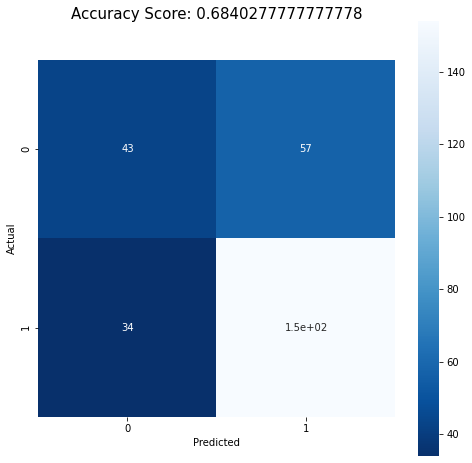

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, nbPredict), annot=True, square = True, cmap='Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, nbPredict))
plt.title(all_sample_title, size = 15);

In [9]:
print('Classification report for decision tree values:\n')
print(classification_report(y_test, nbPredict))

Classification report for decision tree values:

              precision    recall  f1-score   support

       O Won       0.56      0.43      0.49       100
       X Won       0.73      0.82      0.77       188

    accuracy                           0.68       288
   macro avg       0.64      0.62      0.63       288
weighted avg       0.67      0.68      0.67       288



The accuracy is very poor as is clearly visible. The most obvious reason is that Naive Bayes works for datasets which have got no correlation with each other and the attributes are totally independent. In a game of tic-tac-toe, it is the exact opposite. The state of the board is very important in deciding the result.

## Applying Decision Trees

In [10]:
trainedTree = DecisionTreeClassifier(max_depth=5)
trainedTree.fit(x_train, y_train)
treePredict = trainedTree.predict(x_test)

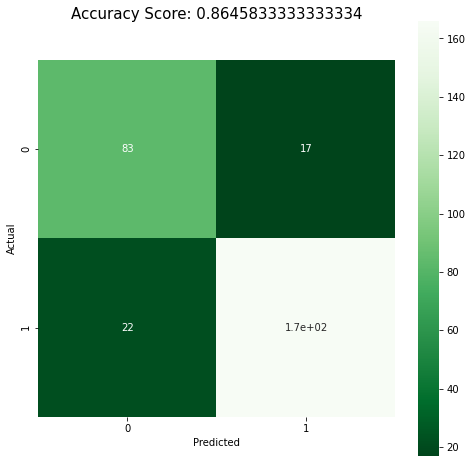

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, treePredict), annot=True, square = True, cmap='Greens_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, treePredict))
plt.title(all_sample_title, size = 15);

In [12]:
print('Classification report for decision tree values:\n')
print(classification_report(y_test, treePredict))

Classification report for decision tree values:

              precision    recall  f1-score   support

       O Won       0.79      0.83      0.81       100
       X Won       0.91      0.88      0.89       188

    accuracy                           0.86       288
   macro avg       0.85      0.86      0.85       288
weighted avg       0.87      0.86      0.87       288



Decision trees is quite capable and useful for this dataset. We can easily keep track of states in a decision tree which means that if there is any correlation between the values, it is taken care of. That's why it can, quite effectively, determine the victories.

## Applying Multi-Layer Perceptron

In [13]:
mlpc = MLPClassifier(max_iter=2000, activation='relu', verbose=2)
mlpc.fit(x_train,y_train)

Iteration 1, loss = 0.76622313
Iteration 2, loss = 0.70033282
Iteration 3, loss = 0.66998799
Iteration 4, loss = 0.65848403
Iteration 5, loss = 0.65732873
Iteration 6, loss = 0.65612498
Iteration 7, loss = 0.65124522
Iteration 8, loss = 0.64552323
Iteration 9, loss = 0.63933276
Iteration 10, loss = 0.63456550
Iteration 11, loss = 0.63161722
Iteration 12, loss = 0.62812440
Iteration 13, loss = 0.62396643
Iteration 14, loss = 0.62005471
Iteration 15, loss = 0.61687083
Iteration 16, loss = 0.61368344
Iteration 17, loss = 0.61108600
Iteration 18, loss = 0.60824267
Iteration 19, loss = 0.60511871
Iteration 20, loss = 0.60214154
Iteration 21, loss = 0.59966601
Iteration 22, loss = 0.59681546
Iteration 23, loss = 0.59437744
Iteration 24, loss = 0.59185125
Iteration 25, loss = 0.58888028
Iteration 26, loss = 0.58633325
Iteration 27, loss = 0.58407748
Iteration 28, loss = 0.58140482
Iteration 29, loss = 0.57868971
Iteration 30, loss = 0.57615596
Iteration 31, loss = 0.57370522
Iteration 32, los

Iteration 254, loss = 0.26734015
Iteration 255, loss = 0.26676845
Iteration 256, loss = 0.26607633
Iteration 257, loss = 0.26576064
Iteration 258, loss = 0.26560217
Iteration 259, loss = 0.26453379
Iteration 260, loss = 0.26358354
Iteration 261, loss = 0.26275613
Iteration 262, loss = 0.26204155
Iteration 263, loss = 0.26201644
Iteration 264, loss = 0.26087455
Iteration 265, loss = 0.26200660
Iteration 266, loss = 0.25981593
Iteration 267, loss = 0.26047219
Iteration 268, loss = 0.25950404
Iteration 269, loss = 0.26024339
Iteration 270, loss = 0.25838592
Iteration 271, loss = 0.25710484
Iteration 272, loss = 0.25639295
Iteration 273, loss = 0.25600674
Iteration 274, loss = 0.25532540
Iteration 275, loss = 0.25453098
Iteration 276, loss = 0.25399723
Iteration 277, loss = 0.25324269
Iteration 278, loss = 0.25377655
Iteration 279, loss = 0.25286280
Iteration 280, loss = 0.25201569
Iteration 281, loss = 0.25175568
Iteration 282, loss = 0.25110494
Iteration 283, loss = 0.25058094
Iteration 

Iteration 517, loss = 0.15920526
Iteration 518, loss = 0.15840047
Iteration 519, loss = 0.15811161
Iteration 520, loss = 0.15798789
Iteration 521, loss = 0.15759644
Iteration 522, loss = 0.15726268
Iteration 523, loss = 0.15749416
Iteration 524, loss = 0.15664762
Iteration 525, loss = 0.15690339
Iteration 526, loss = 0.15635398
Iteration 527, loss = 0.15687324
Iteration 528, loss = 0.15693269
Iteration 529, loss = 0.15609837
Iteration 530, loss = 0.15725643
Iteration 531, loss = 0.15684120
Iteration 532, loss = 0.15583981
Iteration 533, loss = 0.15511356
Iteration 534, loss = 0.15415985
Iteration 535, loss = 0.15383398
Iteration 536, loss = 0.15393629
Iteration 537, loss = 0.15353132
Iteration 538, loss = 0.15322060
Iteration 539, loss = 0.15312922
Iteration 540, loss = 0.15284858
Iteration 541, loss = 0.15228587
Iteration 542, loss = 0.15261164
Iteration 543, loss = 0.15193980
Iteration 544, loss = 0.15191184
Iteration 545, loss = 0.15122368
Iteration 546, loss = 0.15119586
Iteration 

Iteration 791, loss = 0.10065952
Iteration 792, loss = 0.10083901
Iteration 793, loss = 0.10126282
Iteration 794, loss = 0.10034918
Iteration 795, loss = 0.09998010
Iteration 796, loss = 0.10000797
Iteration 797, loss = 0.09989079
Iteration 798, loss = 0.09973364
Iteration 799, loss = 0.09934195
Iteration 800, loss = 0.09918842
Iteration 801, loss = 0.09919486
Iteration 802, loss = 0.09911394
Iteration 803, loss = 0.09918517
Iteration 804, loss = 0.09864997
Iteration 805, loss = 0.09870976
Iteration 806, loss = 0.09829559
Iteration 807, loss = 0.09812413
Iteration 808, loss = 0.09884123
Iteration 809, loss = 0.09771731
Iteration 810, loss = 0.09803994
Iteration 811, loss = 0.09726966
Iteration 812, loss = 0.09801126
Iteration 813, loss = 0.09726406
Iteration 814, loss = 0.09761980
Iteration 815, loss = 0.09750378
Iteration 816, loss = 0.09700128
Iteration 817, loss = 0.09700700
Iteration 818, loss = 0.09673276
Iteration 819, loss = 0.09695271
Iteration 820, loss = 0.09750532
Iteration 

Iteration 1055, loss = 0.06492265
Iteration 1056, loss = 0.06740404
Iteration 1057, loss = 0.06567462
Iteration 1058, loss = 0.06496811
Iteration 1059, loss = 0.06425804
Iteration 1060, loss = 0.06397468
Iteration 1061, loss = 0.06402043
Iteration 1062, loss = 0.06355631
Iteration 1063, loss = 0.06388714
Iteration 1064, loss = 0.06332425
Iteration 1065, loss = 0.06373299
Iteration 1066, loss = 0.06404321
Iteration 1067, loss = 0.06326349
Iteration 1068, loss = 0.06291445
Iteration 1069, loss = 0.06313113
Iteration 1070, loss = 0.06250150
Iteration 1071, loss = 0.06367202
Iteration 1072, loss = 0.06397931
Iteration 1073, loss = 0.06330386
Iteration 1074, loss = 0.06282734
Iteration 1075, loss = 0.06252299
Iteration 1076, loss = 0.06216798
Iteration 1077, loss = 0.06231663
Iteration 1078, loss = 0.06164178
Iteration 1079, loss = 0.06237828
Iteration 1080, loss = 0.06157739
Iteration 1081, loss = 0.06200568
Iteration 1082, loss = 0.06161689
Iteration 1083, loss = 0.06158459
Iteration 1084

Iteration 1300, loss = 0.04239047
Iteration 1301, loss = 0.04252010
Iteration 1302, loss = 0.04240334
Iteration 1303, loss = 0.04236017
Iteration 1304, loss = 0.04213734
Iteration 1305, loss = 0.04246778
Iteration 1306, loss = 0.04195713
Iteration 1307, loss = 0.04259948
Iteration 1308, loss = 0.04165886
Iteration 1309, loss = 0.04291417
Iteration 1310, loss = 0.04145943
Iteration 1311, loss = 0.04261839
Iteration 1312, loss = 0.04181953
Iteration 1313, loss = 0.04220545
Iteration 1314, loss = 0.04263730
Iteration 1315, loss = 0.04170127
Iteration 1316, loss = 0.04218754
Iteration 1317, loss = 0.04228512
Iteration 1318, loss = 0.04140287
Iteration 1319, loss = 0.04093933
Iteration 1320, loss = 0.04097395
Iteration 1321, loss = 0.04138539
Iteration 1322, loss = 0.04093988
Iteration 1323, loss = 0.04089087
Iteration 1324, loss = 0.04078966
Iteration 1325, loss = 0.04101898
Iteration 1326, loss = 0.04076121
Iteration 1327, loss = 0.04052015
Iteration 1328, loss = 0.04059097
Iteration 1329

Iteration 1551, loss = 0.02808642
Iteration 1552, loss = 0.02757134
Iteration 1553, loss = 0.02744673
Iteration 1554, loss = 0.02751702
Iteration 1555, loss = 0.02728194
Iteration 1556, loss = 0.02733221
Iteration 1557, loss = 0.02769548
Iteration 1558, loss = 0.02759145
Iteration 1559, loss = 0.02747994
Iteration 1560, loss = 0.02717667
Iteration 1561, loss = 0.02707088
Iteration 1562, loss = 0.02704177
Iteration 1563, loss = 0.02715413
Iteration 1564, loss = 0.02699264
Iteration 1565, loss = 0.02709249
Iteration 1566, loss = 0.02699544
Iteration 1567, loss = 0.02724861
Iteration 1568, loss = 0.02679638
Iteration 1569, loss = 0.02691891
Iteration 1570, loss = 0.02729942
Iteration 1571, loss = 0.02675713
Iteration 1572, loss = 0.02657987
Iteration 1573, loss = 0.02668528
Iteration 1574, loss = 0.02645442
Iteration 1575, loss = 0.02659087
Iteration 1576, loss = 0.02631793
Iteration 1577, loss = 0.02638459
Iteration 1578, loss = 0.02626947
Iteration 1579, loss = 0.02660798
Iteration 1580

MLPClassifier(max_iter=2000, verbose=2)

The verbose suggests that we should have our epochs set to about 1200. There is not much of an improvement beyond that because of which it is smarter to stop iterating. Although, upon multiple runs, we see that the number of epochs varies between 1000 and 2000. Thus, it is suggested to keep max_iter as 2000 to make sure that the model has taken almost as many epochs as it may need.

In [14]:
mpred = mlpc.predict(x_test)

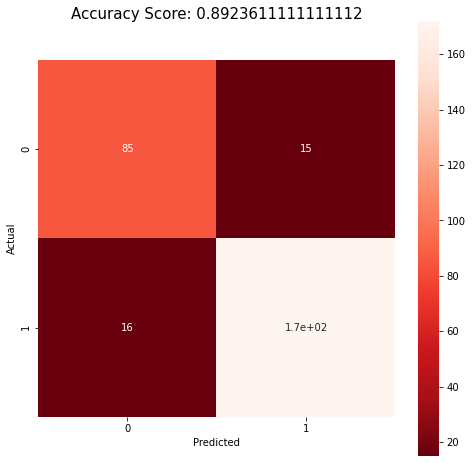

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(y_test, mpred), annot=True, square = True, cmap='Reds_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}\n\n'.format(metrics.accuracy_score(y_test, mpred))
plt.title(all_sample_title, size = 15);

In [16]:
print('Classification report for decision tree values:\n')
print(classification_report(y_test, mpred))

Classification report for decision tree values:

              precision    recall  f1-score   support

       O Won       0.84      0.85      0.85       100
       X Won       0.92      0.91      0.92       188

    accuracy                           0.89       288
   macro avg       0.88      0.88      0.88       288
weighted avg       0.89      0.89      0.89       288



Due to an imbalance in the dataset, it is easy to notice that the chances of O winning are actually lesser than the chances of X winning. The overall accuracy of the model also seems to be more than that of the decision tree. Thus, using the Multi-Layer Perceptron for this model is not at all a bad choice.

In [17]:
iterArray = range(1500,2100,100)
accArray = []
runs = 3

for i in iterArray:
    accAvg = 0
    for j in range(runs):
        mlp = MLPClassifier(max_iter=i, activation='relu', verbose=0)
        mlp.fit(x_train,y_train)
        pred = mlp.predict(x_test)
        accAvg += metrics.accuracy_score(y_test, pred)
    accAvg /= runs
    accArray.append(accAvg)

C:\Users\hites\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(


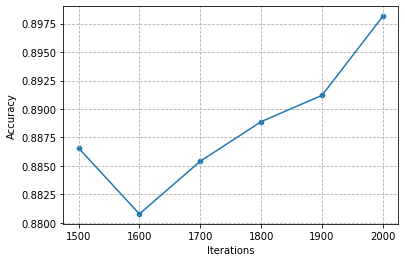

In [18]:
sns.scatterplot(x=iterArray,y=accArray)
sns.lineplot(x=iterArray,y=accArray)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(linestyle='--')